In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

from torchsummary import summary

In [79]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [89]:
class AlexNet_CryptGPU(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet_CryptGPU, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=9),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2),
            # nn.BatchNorm2d(num_features=96),

            nn.Conv2d(96, 256, kernel_size=5, padding=1),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2, stride=1),
            # nn.BatchNorm2d(num_features=256),
            
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        if num_classes == 10:
            self.fc_layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(256, 256),
                nn.ReLU(inplace=True),
                nn.Linear(256, 256),
                nn.ReLU(inplace=True),
                nn.Linear(256, 10),
            )
        elif num_classes == 200:
            self.fc_layers = nn.Sequential(
                nn.AvgPool2d(kernel_size=2),
                nn.Flatten(),
                nn.Linear(1024, 1024),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 1024),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 200),
            )
        elif num_classes == 1000:
            self.fc_layers = nn.Sequential(
                nn.AvgPool2d(kernel_size=4),
                nn.Flatten(),
                nn.Linear(9216, 4096),
                nn.ReLU(),
                nn.Linear(4096, 4096),
                nn.ReLU(),
                nn.Linear(4096, 1000),
            )

    def forward(self, x):
        x = self.features(x)
        x = self.fc_layers(x)
        return x
    
class AlexNet_Falcon(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet_Falcon, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=9),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(num_features=96),

            nn.Conv2d(96, 256, kernel_size=5, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(num_features=256),

            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        if num_classes == 10:
            self.fc_layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(256, 256),
                nn.ReLU(inplace=True),
                nn.Linear(256, 256),
                nn.ReLU(inplace=True),
                nn.Linear(256, 10),
                # nn.ReLU(inplace=True),
            )
        elif num_classes == 200:
            self.fc_layers = nn.Sequential(
                nn.AvgPool2d(kernel_size=2),
                nn.Flatten(),
                nn.Linear(1024, 1024),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 1024),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 200),
            )
        elif num_classes == 1000:
            self.fc_layers = nn.Sequential(
                nn.AvgPool2d(kernel_size=4),
                nn.Flatten(),
                nn.Linear(9216, 4096),
                nn.ReLU(),
                nn.Linear(4096, 4096),
                nn.ReLU(),
                nn.Linear(4096, 1000),
            )

    def forward(self, x):
        x = self.features(x)
        x = self.fc_layers(x)
        return x

class AlexNet_Official(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet_Official, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x
    
class AlexNet_Official_modify(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet_Official_modify, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=7, stride=2, padding=2),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            # nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            # nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x

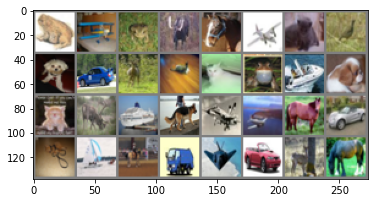

 frog plane  frog  deer


In [81]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [90]:
from tensorboardX import SummaryWriter
logger = SummaryWriter(log_dir = 'log')


model = AlexNet_CryptGPU(num_classes=10)
summary(model, (3, 32, 32))


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 
# AlexNet Official
# lr=0.001, momentum=0.9 converges about 2~3 epoch. Without momentum, it does not converge.
# lr=0.01 (remove Dropout) converges about 3~4 epoch.

# AlexNet Official Modified: MaxPooling --> AvgPooing, remove Dropout
# lr=0.01 converges

# AlexNet CryptGPU
# lr=0.01. momentum=0.9 not converge. No BN, remove the last avgpooling layer.

# AlexNet Falcon
# lr=0.01 converges

dataiter = iter(trainloader)
# images, labels = dataiter.next()
it = 10
for epoch in range(it):
    for batch, data in enumerate(trainloader, 0):
        images, labels = data
        output = model(images)

        # MSEloss
        labels = torch.nn.functional.one_hot(labels, num_classes=10).float()
        optimizer.zero_grad()
        loss = criterion(output, labels)
        loss.backward()
        
        optimizer.step()
        if batch % 100 == 0:
            print('Epoch: {}, Batch {}, Loss: {}'.format(epoch, batch, loss.item()))

output = model(images)
_, output = torch.max(output, 1)
print(f"Output: ${output}")
print(f"Target: ${labels}")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 10, 10]          34,944
              ReLU-2           [-1, 96, 10, 10]               0
         AvgPool2d-3             [-1, 96, 4, 4]               0
            Conv2d-4            [-1, 256, 2, 2]         614,656
              ReLU-5            [-1, 256, 2, 2]               0
         AvgPool2d-6            [-1, 256, 1, 1]               0
            Conv2d-7            [-1, 384, 1, 1]         885,120
              ReLU-8            [-1, 384, 1, 1]               0
            Conv2d-9            [-1, 384, 1, 1]       1,327,488
             ReLU-10            [-1, 384, 1, 1]               0
           Conv2d-11            [-1, 256, 1, 1]         884,992
             ReLU-12            [-1, 256, 1, 1]               0
          Flatten-13                  [-1, 256]               0
           Linear-14                  [

# Batch Normalization Pseudocode

In [15]:
import math

IT_N = 3
def inverse_sqrt(x):
    init_g = np.exp(-(x/2+0.2))*2 + 0
    init_g -= x/1024

    for i in range(IT_N):
        init_g = init_g*(3-x * init_g * init_g)/2
    return init_g
    
class BN:
    def __init__(self, dims, gamma=0, beta=0):
        print('BN')
        self.eps = 1e-5
        self.gamma = np.ones((dims, ), dtype="float32")
        self.beta = np.zeros((dims, ), dtype="float32")
        
        self.inv_sqrt = None
        self.norm_x = None

        self.beta_grad = None
        self.gamma_grad = None
        self.act_grad = None

    def forward(self, x):
        mean = np.mean(x, axis=0)   # 1 truncation by batchSize [1, D]
        x_mean = x - mean   # [B, D]
        var = np.mean(x_mean * x_mean, axis=0)  # 1 multiplication, 1 truncation by batchsize [1, D]
        var_eps = var + self.eps

        # protocol inv_sqrt
        self.inv_sqrt = 1. / np.sqrt(var_eps)   # 1 inverse sqrt [1, D]
        print("======")
        print(self.inv_sqrt)
        print(inverse_sqrt(var_eps))
        self.norm_x = x_mean * self.inv_sqrt    # 1 multiplication [B, D] * [1, D]. Falcon here has bug.

        return self.gamma * self.norm_x + self.beta     # 1 multiplication

    def backward(self, grad):
        B, D = grad.shape
        self.beta_grad = np.sum(grad, axis=0)
        self.gamma_grad = np.sum(self.norm_x * grad, axis=0)    # 1 multiplication

        dxhat = grad * self.gamma   # 1 multiplication
        self.act_grad = self.inv_sqrt * \
                        (B*dxhat - np.sum(dxhat, axis=0) - self.norm_x * np.sum(dxhat * self.norm_x, axis=0)) \
                        / B # 3 multiplication, 1 truncation

        return self.act_grad, self.gamma_grad, self.beta_grad

bn = BN(5)

data = np.array([[1, 2, 3, 4, 5],
                 [1, 3, 5, 7, 8],
                 [1, 2, 3, 6, 6]]).astype(np.float32)
x_raw = torch.from_numpy(data)
x = x_raw.numpy()

grad = np.ones((3, 5))

print("forward")
f_o = bn.forward(x)
print(f_o)

print("backward")
b_o = bn.backward(grad)
print(b_o)

print(inverse_sqrt(np.array([16, 100, 0.01])))

BN
forward
[316.22778     2.1212728   1.0606542   0.8017812   0.8017812]
[5.5259943 2.119485  1.0606542 0.8017811 0.8017811]
[[ 0.         -0.7070908  -0.70710284 -1.3363018  -1.0690417 ]
 [ 0.          1.4141821   1.4142054   1.0690417   1.3363018 ]
 [ 0.         -0.7070908  -0.70710284  0.26726052 -0.26726052]]
backward
(array([[ 0.00000000e+00,  2.38407846e-07, -5.96039745e-08,
         1.59654265e-07, -1.27723446e-07],
       [ 0.00000000e+00, -4.76815853e-07,  1.19207929e-07,
        -1.27723446e-07,  1.59654265e-07],
       [ 0.00000000e+00,  2.38407846e-07, -5.96039745e-08,
        -3.19308722e-08, -3.19308722e-08]]), array([ 0.00000000e+00,  4.76837158e-07, -2.38418579e-07,  4.47034836e-07,
       -4.47034836e-07]), array([3., 3., 3., 3., 3.]))
[-0.05037197 -0.1         5.11753794]


In [84]:
class MyBN:
    def __init__(self, momentum, eps, num_features):
        """
        初始化参数值
        :param momentum: 追踪样本整体均值和方差的动量
        :param eps: 防止数值计算错误
        :param num_features: 特征数量
        """
        # 对每个batch的mean和var进行追踪统计
        self._running_mean = 0
        self._running_var = 1
        # 更新self._running_xxx时的动量
        self._momentum = momentum
        # 防止分母计算为0
        self._eps = eps
        # 对应论文中需要更新的beta和gamma，采用pytorch文档中的初始化值
        self._beta = np.zeros(shape=(num_features, ))
        self._gamma = np.ones(shape=(num_features, ))

    def batch_norm(self, x):
        """
        BN向传播
        :param x: 数据
        :return: BN输出
        """
        x_mean = x.mean(axis=0)
        x_var = x.var(axis=0)
        # 对应running_mean的更新公式
        self._running_mean = (1-self._momentum)*x_mean + self._momentum*self._running_mean
        self._running_var = (1-self._momentum)*x_var + self._momentum*self._running_var
        # 对应论文中计算BN的公式
        x_hat = (x-x_mean)/np.sqrt(x_var+self._eps)
        y = self._gamma*x_hat + self._beta
        return y

my_bn = MyBN(momentum=0.01, eps=1e-5, num_features=5)
bn_output = my_bn.batch_norm(x)
print(bn_output)

[[ 0.         -0.70709074 -0.70710289 -1.3363018  -1.06904161]
 [ 0.          1.41418195  1.41420555  1.06904161  1.3363018 ]
 [ 0.         -0.70709074 -0.70710289  0.26726052 -0.26726052]]


In [1]:

def batchnorm_forward(x, gamma, beta, eps):
    # read some useful parameter
    N, D = x.shape

    # BN forward pass
    sample_mean = x.mean(axis=0)
    sample_var = x.var(axis=0)
    x_ = (x - sample_mean) / np.sqrt(sample_var + eps)
    out = gamma * x_ + beta

    # storage variables for backward pass
    cache = (x_, gamma, x - sample_mean, sample_var + eps)

    return out, cache


def batchnorm_backward(dout, cache):
    # extract variables
    N, D = dout.shape
    x_, gamma, x_minus_mean, var_plus_eps = cache

    # calculate gradients
    dgamma = np.sum(x_ * dout, axis=0)
    dbeta = np.sum(dout, axis=0)

    dx_ = np.matmul(np.ones((N,1)), gamma.reshape((1, -1))) * dout
    dx = N * dx_ - np.sum(dx_, axis=0) - x_ * np.sum(dx_ * x_, axis=0)
    dx *= (1.0/N) / np.sqrt(var_plus_eps)

    return dx, dgamma, dbeta

gamma = np.ones((5, ), dtype="float32")
beta = np.zeros((5, ), dtype="float32")
f_o, cache = batchnorm_forward(x, gamma, beta, 1e-5)
print('forward', f_o)

grad = np.ones((3, 5), dtype='float32')
dx, dgamma, dbeta = batchnorm_backward(grad, cache)
print(dx)
print(dgamma)
print(dbeta)

NameError: name 'np' is not defined